In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# 폰트 지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
data = pd.read_csv('dataset/data.csv')

data = data.dropna()  # 결측값 제거

# Date 컬럼을 'YYYYMMDD' 형식으로 변경 (datetime 형식으로 변환 후 형식 지정)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', utc=True)  # 'Date' 컬럼을 datetime 형식으로 변환, 시간대 처리
data['Date'] = data['Date'].dt.strftime('%Y%m%d')  # 'YYYYMMDD' 형식으로 변환

In [31]:
# 데이터 전처리
data = data.dropna() # 결측값 제거
X = data[['Date', 'Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits']]
y = data['Close']
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,19800317,0.181500,0.184404,0.181500,0.181500,10924800,0.0,0.0
1,19800318,0.181500,0.182952,0.180048,0.180048,17068800,0.0,0.0
2,19800319,0.184404,0.187308,0.184404,0.184404,18508800,0.0,0.0
3,19800320,0.184403,0.186581,0.183678,0.183678,11174400,0.0,0.0
4,19800321,0.180048,0.180048,0.177143,0.177143,12172800,0.0,0.0


In [32]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [33]:
# 1. 랜덤 포레스트 모델
rf_model = RandomForestRegressor(random_state=42, n_estimators=100) # n_estimators : 모델을 구성하는 경정 틀의 갯수 수
rf_model.fit(X_train, y_train) # fit : 자동 학습
rf_y_pred = rf_model.predict(X_test) # predict : 결과값 예측

In [34]:
# 랜덤 포레스트 평가
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f"랜덤 포레스트 - MSE : {rf_mse:.2f}, R2 : {rf_r2:.2f}")

랜덤 포레스트 - MSE : 0.06, R2 : 1.00


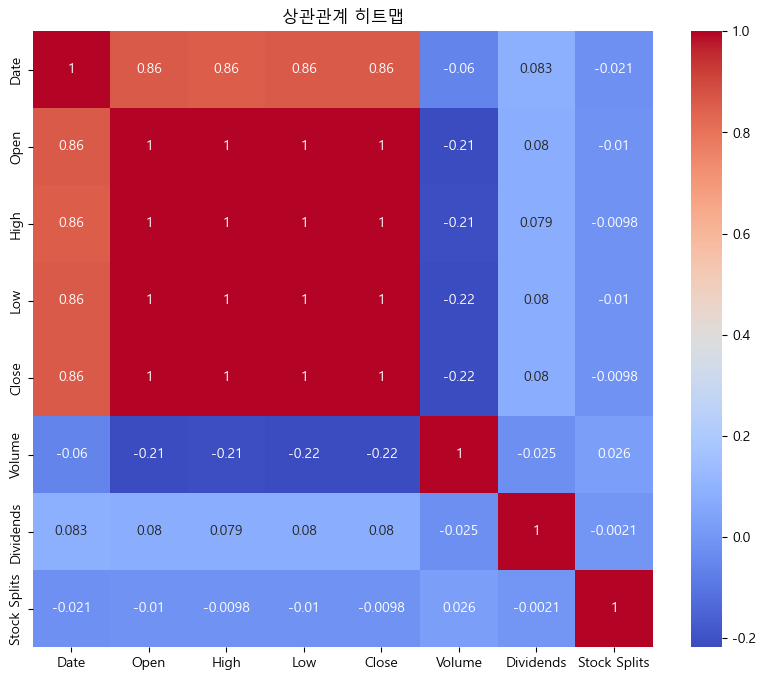

In [35]:
# 변수별 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('상관관계 히트맵')
plt.show()